![NASA](http://www.nasa.gov/sites/all/themes/custom/nasatwo/images/nasa-logo.svg)

---

# The Future

### GSFC Intermediate/Advanced Python Bootcamp 2017

#### Brent Smith

---

![Back to the Future](http://pbs.twimg.com/media/CR1_f8sWwAA3qjB.jpg)

# 1. Compatibility

---

One of the biggest debates within the Python community is choosing Python 2.x or Python 3.x. From the 2016 PyCon keynote from Guido van Rossum ([link](http://youtu.be/YgtL4S7Hrwo)), Python 2.7 was announced to be the last of the 2.x series.

Even more evidence: [http://pythonclock.org](https://pythonclock.org)

### Got Python 2?

---

If you have code that is still in Python 2.x, there is a very useful guide to help you transition your code.

Details:

* [Python-Future](http://python-future.org)
* [Six: Python 2 and 3 Compatibility Library](http://pythonhosted.org/six/)

### Quick Synopsis

---

* `print` is a function, not a statement
  * Python 2.x: ```print 'Hello',```
  * Python 3.x: ```print('Hello', end='')```
* Strings ([unicode link](http://docs.python.org/3/howto/unicode.html)):
  * Python 2.x: str has no encoding (not utf-8)
  * Python 3.x: str is unicode
* Division:
  * Python 2.x: 3/2 = 1
  * Python 3.x: 3/2 = 1.5
* Others: exceptions, class definitions, etc.

### Python 2/3 Compatible Code Example

In [ ]:
from __future__ import print_function
from __future__ import division

print(
    'A new print function using Python 2.',
    end='...err {result}.'.format(result=3/2)
)

In [ ]:
3//2

[Formatting Strings Reference](http://pyformat.info)

# 2. New Stuff...The Future!

---

Included is a small showcase of 4 new packages (to me) in Python for scientific/engineering applications:

* [asyncio](http://docs.python.org/3/library/asyncio.html) - asynchronous/concurrent computing (single-thread) __(not covered)__
* [xarray](http://xarray.pydata.org/en/stable/) - pandas, but for N-dimensional arrays __(not covered)__
* [bokeh](http://bokeh.pydata.org/en/latest/) - interactive visualizations
* [dask](http://dask.pydata.org/en/latest/) - parallel and distributed computing

### 2.1 Bokeh

---

Python visualization package aimed at web browsers/sites for interactivity and display. It uses json to send the data to the browser and then uses javascript ([BokehJS](http://bokeh.pydata.org/en/latest/docs/dev_guide/bokehjs.html)) to add interactivity.

_Note:_ Output can be to a web page, the Jupyter notebook (inline), or even a local Bokeh server (think dashboards, visualizing large datasets).

__Links:__

* [Official Gallery](http://bokeh.pydata.org/en/latest/docs/gallery.html)

__2.1.1 Charts__

Bokeh charts are primarily used for statistical plots such as a histogram, pie (donut) chart, box plot, etc. These are very useful when needing to visualize your data quickly and dynamically (think monitoring data trends through a dashboard of visualizations).

![Charts Diagram](http://chdoig.github.io/pyladiesatx-bokeh-tutorial/images/charts.png)

__Sample Data:__ We need some data to work with, so Bokeh provides the interface to download some sample datasets that we can use for examples.

In [ ]:
import bokeh
bokeh.sampledata.download()

## Update

> For those having issues downloading the sample data, you might also try it from the command prompt/terminal. With a new prompt/terminal with the same Python environment activated/sourced, execute:

> ```bash
  bokeh sampledata
  ```

> This should download the data identically as the Python commands above.

In [ ]:
# example from: http://nbviewer.jupyter.org/github/bokeh/bokeh-notebooks/blob/master/tutorial/10%20-%20charts.ipynb
from bokeh.sampledata.iris import flowers
flowers.head()

In [ ]:
type(flowers)

In [ ]:
from bokeh.charts import Scatter, show, output_notebook, output_file
output_notebook()
p = Scatter(flowers, x='petal_length', y='petal_width')
show(p)

## Update

> In bokeh, you can specify 3 different output methods:
    * `output_notebook()`: output inline to the Jupyter notebook
    * `output_file(filename)` outputs to a local file (usually with a html extension)
    * A bokeh server. [Link](http://bokeh.pydata.org/en/latest/docs/user_guide/server.html)
    
> If you pick either the `output_notebook` or `output_file` and want to change to the other, you need to execute `reset_output()` and then call the desired output method. [Reference](http://stackoverflow.com/a/34794655)

In [ ]:
p = Scatter(flowers, x='petal_length', y='petal_width', color='species', legend='top_left', xlabel='Hi there.')
# sample output_file method
#output_file('test.html')
show(p)

__2.1.2 Plotting__

---

The most popular use of Bokeh is it's plotting interface. This is different than charts in that plotting is centered at the way you plot data (not by a specific type of plot, think boxes rather than circles).

![Plotting Diagram](http://chdoig.github.io/pyladiesatx-bokeh-tutorial/images/plotting.png)

In [ ]:
# example from: http://bokeh.pydata.org/en/latest/docs/gallery/texas.html
from bokeh.io import show
from bokeh.models import (
    ColumnDataSource,
    HoverTool,
    LogColorMapper
)
from bokeh.palettes import Viridis6 as palette
from bokeh.plotting import figure, output_notebook

from bokeh.sampledata.us_counties import data as counties
from bokeh.sampledata.unemployment import data as unemployment

# output to Jupyter notebook
output_notebook()

# color palette reversal
palette.reverse()

# dictionary of data
counties = {
    code: county for code, county in counties.items() if county["state"] == "md"
}

county_xs = [county["lons"] for county in counties.values()]
county_ys = [county["lats"] for county in counties.values()]

county_names = [county['name'] for county in counties.values()]
county_rates = [unemployment[county_id] for county_id in counties]
color_mapper = LogColorMapper(palette=palette)

# Bokeh model of data
source = ColumnDataSource(data=dict(
    x=county_xs,
    y=county_ys,
    name=county_names,
    rate=county_rates,
))

# Bokeh plot utilities
TOOLS = "pan,wheel_zoom,reset,hover,save"

# plotting interface
p = figure(
    title="Texas Unemployment, 2009", tools=TOOLS,
    x_axis_location=None, y_axis_location=None
)
p.grid.grid_line_color = None

# adding the data to the plot
p.patches('x', 'y', source=source,
          fill_color={'field': 'rate', 'transform': color_mapper},
          fill_alpha=0.7, line_color="white", line_width=0.5)

# added interactivity
hover = p.select_one(HoverTool)
hover.point_policy = "follow_mouse"
hover.tooltips = [
    ("Name", "@name"),
    ("Unemployment rate)", "@rate%"),
    ("(Long, Lat)", "($x, $y)"),
]

show(p)

__2.1.3 Models__

---

The underlying objects that create a Bokeh plot or chart (i.e., Object-Oriented Programming entry point to Bokeh).

![Models Part 1](http://chdoig.github.io/pyladiesatx-bokeh-tutorial/images/models1.png)

![Models Part 2](http://chdoig.github.io/pyladiesatx-bokeh-tutorial/images/models2.png)

### 2.2 dask

---

Parallelization and distributed computing is hard to grasp because we weren't taught that at the beginning (i.e., debugging, developing, etc. but for distributed systems is hard).

Examples from:
* Matthew Rocklin talks: [PlotCon](http://youtu.be/FTJwDeXkggU) and [PyCon](http://youtu.be/RA_2qdipVng)
* Official Docs: [link](http://distributed.readthedocs.io/en/latest/web.html#example-computation)

In a nutshell:
* Parallel computing library for Python
* Task scheduler (low-latency ~10ms)
* Uses other packages to aid (PyData ecosystem): numpy, pandas, etc.
* Can be scaled (laptop to supercomputer)

A simple example...

In [1]:
from time import sleep
import random

def inc(x):
    sleep(0.2)
    return x + 1

def double(x):
    sleep(0.2)
    return 2 * x

def add(x,y):
    sleep(0.2)
    return x + y

Serial/Sequential calculations to obtain a mathematical total. (Benchmark ~5 seconds on a Mac laptop.)

In [2]:
%%time

data = [1, 2, 3, 4, 5, 6, 7, 8]

out = []
for x in data:
    y = inc(x)
    z = double(y)
    out.append(z)
    
total = 0
for z in out:
    total = add(total, z)

print(total)

88
CPU times: user 1.84 ms, sys: 1.56 ms, total: 3.41 ms
Wall time: 4.87 s


## Update

> We tell dask in the code below that each of these methods are going to be parallelized by wrapping them as dask delayed functions. The functions have not been executed in this block below, merely proxy objects that have a graph associated with it (see visualize below).

In [3]:
import dask

# delayed means to setup but not compute yet
inc = dask.delayed(inc)
double = dask.delayed(double)
add = dask.delayed(add)

## Update

> The `visualize` method below requires the _graphviz_ package. I have tried installing it via `conda install`, but what worked for me was `pip install` on the command line in the appropriate Python environment.

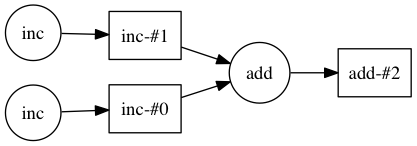

In [4]:
x = inc(1)
y = inc(2)
z = add(x, y)
dask.visualize(z, rankdir='LR')

## Update

> The next code block now uses our wrapped/delayed methods to create a delayed total. It has not physically calculated the total in which makes this execution very fast. The actual computation follows afterwards via the `dask.compute` call.

In [5]:
%%time

data = [1, 2, 3, 4, 5, 6, 7, 8]

out = []
for x in data:
    y = inc(x)
    z = double(y)
    out.append(z)
    
total = 0
for z in out:
    total = add(total, z)

total

CPU times: user 901 µs, sys: 429 µs, total: 1.33 ms
Wall time: 1.06 ms


## Update

> Now we have our new delayed methods that will be parallelized rather than sequential. To schedule or perform the processes/calculations we tell dask to compute the total. You will notice that it is faster (~2 seconds)than the prior sequential computation of roughly ~5 seconds on a Mac laptop.

> It also returns the correct calculated value as expected.

In [6]:
%%time
dask.compute(total)

CPU times: user 13.2 ms, sys: 5.66 ms, total: 18.9 ms
Wall time: 2.04 s


(88,)

Notice that even though this was parallelized, there are still parts that are sequential in computation. This hints at better parallelization algorithms/schemes.

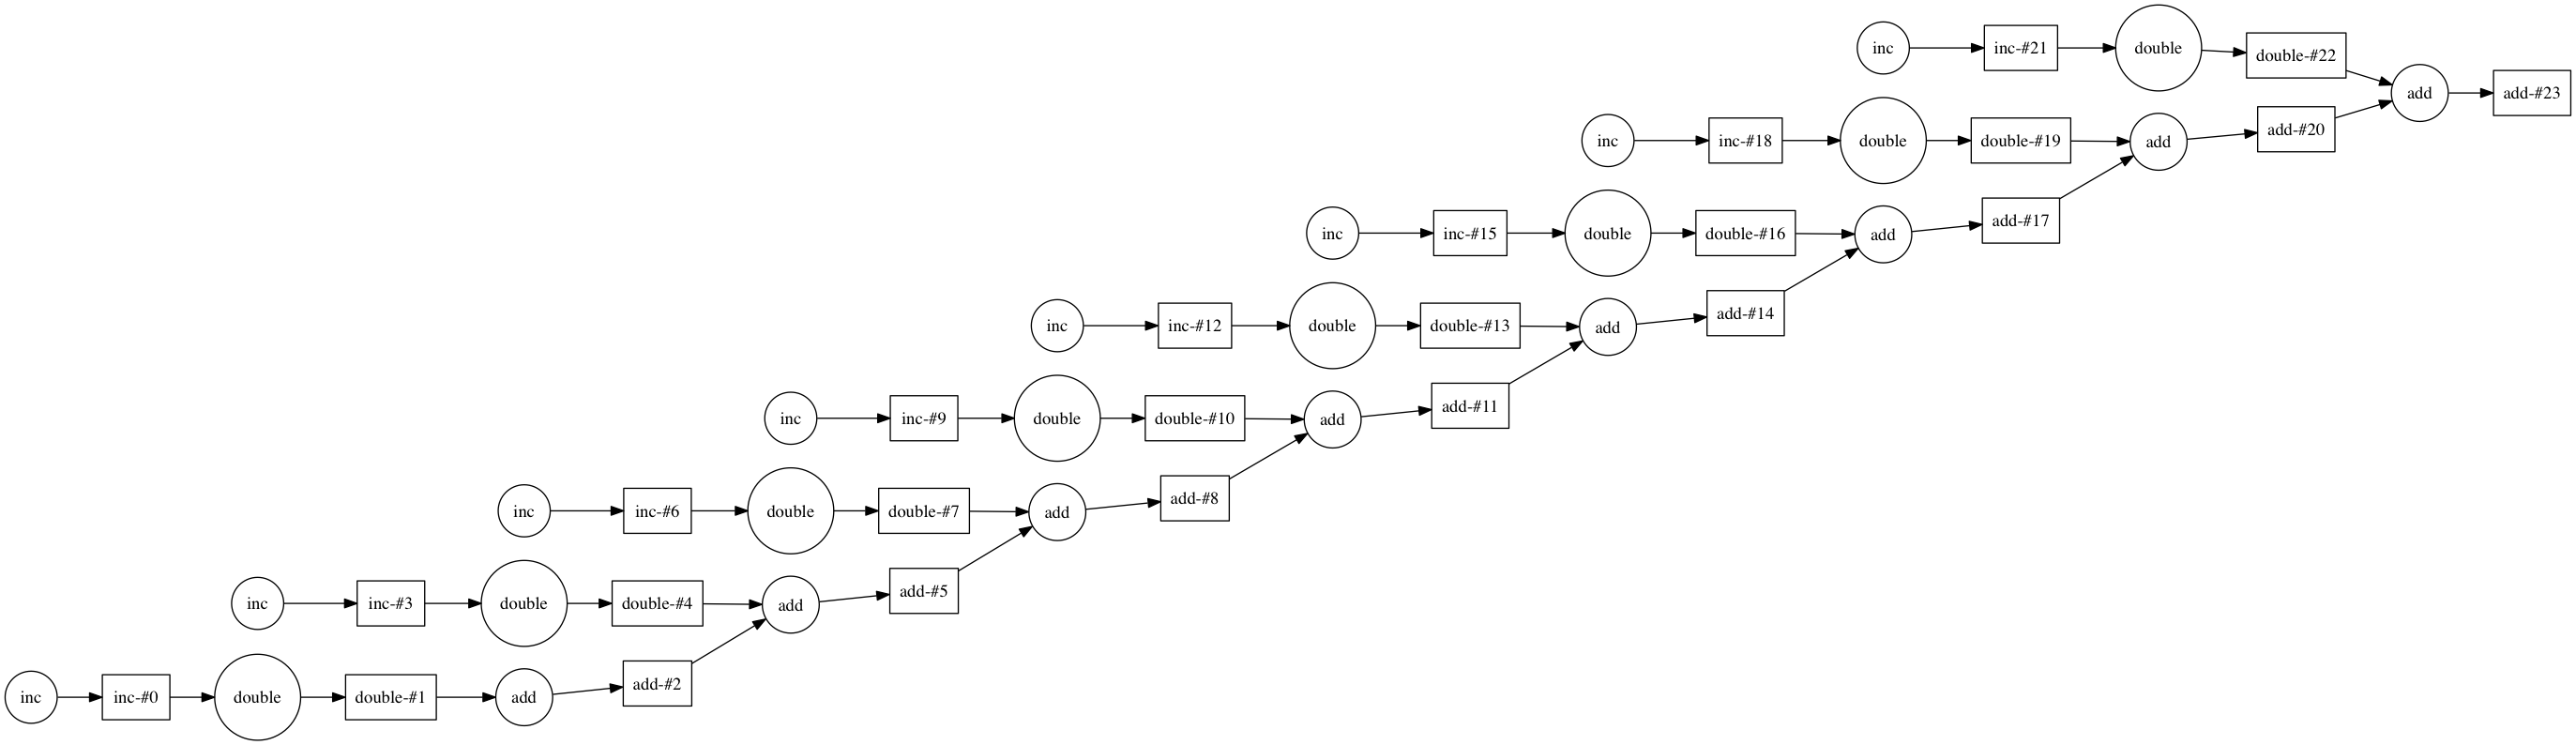

In [7]:
dask.visualize(total, rankdir='LR') # sequential dependence still evident by visualization

In [8]:
%%time

data = [1, 2, 3, 4, 5, 6, 7, 8]

out = []
for x in data:
    y = inc(x)
    z = double(y)
    out.append(z)
    
# tree reduction
while len(out) > 1:
    out = [add(out[i], out[i+1]) for i in range(0, len(out), 2)]

total = out[0]

CPU times: user 893 µs, sys: 354 µs, total: 1.25 ms
Wall time: 1.05 ms


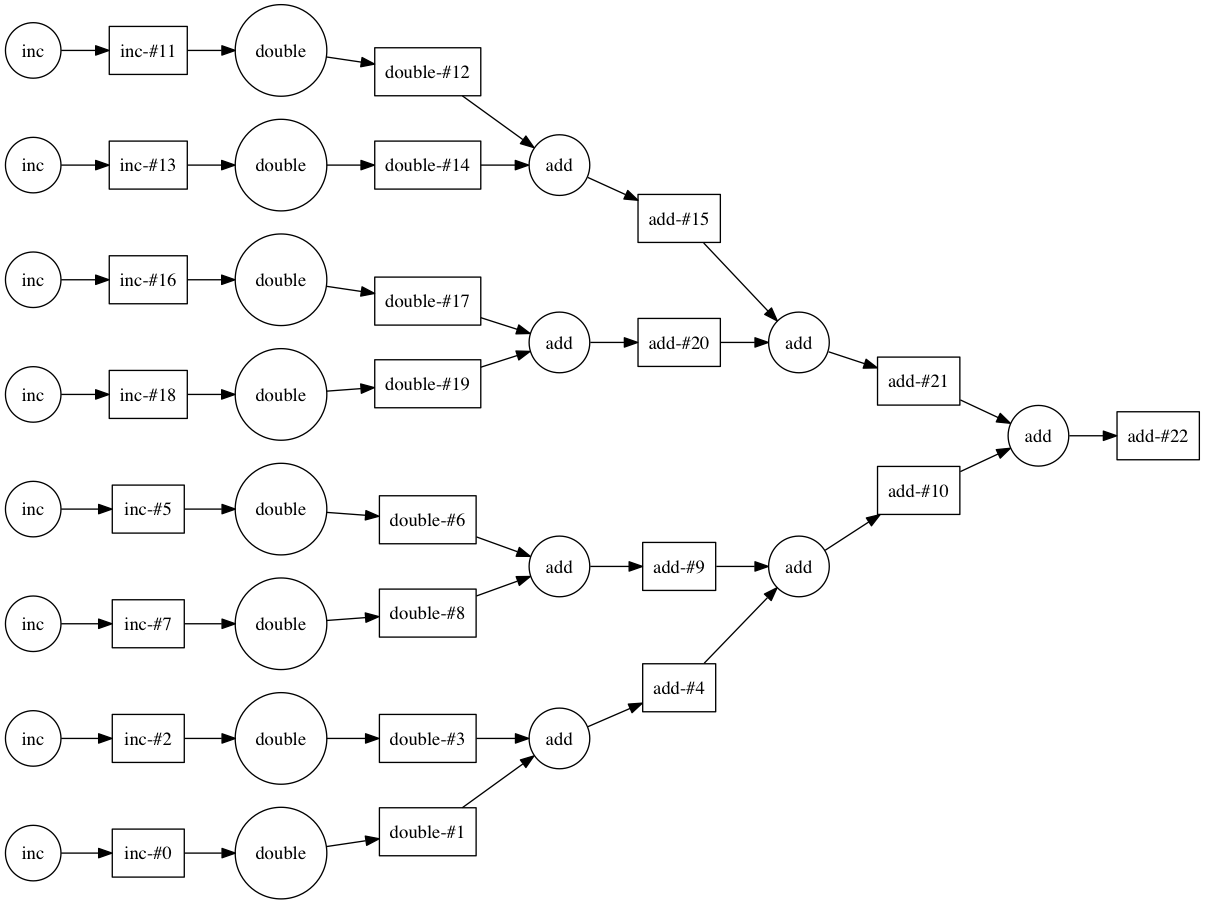

In [9]:
dask.visualize(total, rankdir='LR')

## Update

> While this new method of the tree reduction seems fast, remember that it has not actually performed the calculation in question. Let's do that now.

> I saw a reduction in time to ~1 second with this new and more appropriate algorithm for summations.

In [10]:
%%time

dask.compute(total)

CPU times: user 7.14 ms, sys: 3.79 ms, total: 10.9 ms
Wall time: 1.02 s


(88,)

We can instantly see which of these two algorithms will be better for parallelization. But what if we had a more complex computation...

In [ ]:
import dask.array as da

# 15x15 array of ones chunked into 5x5 squares (uses NumPy mainly)
x = da.ones((15, 15), chunks=(5,5))

In [ ]:
dask.visualize(x)

In [ ]:
dask.visualize((x.dot(x.T) - x.mean(axis=0)).std())

But this graph does not give us any indication whether our parallelization is efficient or not (as well as using resources appropriately). We need a way to visualize how it __performs__ on a system.

## Update

> Steps to create the dask bokeh server:
    1. You need 2 terminal/command prompt sessions/windows that have the appropriate Python environment activated/sourced.
    2. Execute `dask-scheduler` in the first session/window. If you do not have this command line utilty, you need to install the _"distributed"_ package. [Link](http://distributed.readthedocs.io/en/latest/install.html)
    3. The scheduler will give addresses:
      * scheduler: this is the address we use for the workers
      * http: to view the local web server, copy this address into a browser
      * bokeh: this is where our bokeh server/visualizer/dashboard will be
    4. Schedule a dask worker for the scheduler in the next terminal session/window:
      ```bash
      dask-worker xxx.xxx.xxx.xxx:xxxx
      ```
      By using the address given from the scheduler (minus the tcp part).
    5. Change the code below in the jupyter notebook to reflect the dask-scheduler address.
    6. Open a new browser tab/window and go to the bokeh server address from the __dask-scheduler__ information. If you used the one from the worker, you will not have all the utilities available.
    7. Click on the __status__ text to view the dashboard for processes running.
    8. Execute the code below from the notebook and view the output in the dask bokeh dashboard. You can repeatedly do this and modify the parallelization to get better performance.

In [ ]:
from distributed import Client
from time import sleep
import random
import dask

def inc(x):
    sleep(random.random() / 10)
    return x + 1

def dec(x):
    sleep(random.random() / 10)
    return x - 1

def add(x, y):
    sleep(random.random() / 10)
    return x + y


# change this to the address and port from your dask bokeh server
client = Client('127.0.0.1:8786')

incs = client.map(inc, range(100))
decs = client.map(dec, range(100))
adds = client.map(add, incs, decs)
total = client.submit(sum, adds)

del incs, decs, adds
total.result()